# IMDB Top250 Tvshows Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

***Dataset:*** - https://www.kaggle.com/datasets/ritiksharma07/top-250-imdb-tv-shows

In [2]:
df = pd.read_csv('IMDB_Top250_Tvshows.csv',encoding='latin-1')
df

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,20082013,62 eps,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6 eps,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11 eps,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10 eps,15,9.4,(533K),TV Mini Series
4,5. Chernobyl,2019,5 eps,15,9.3,(876K),TV Mini Series
...,...,...,...,...,...,...,...
245,246. Your Lie in April,20142015,24 eps,12,8.5,(39K),TV Series
246,247. Community,20092015,110 eps,12,8.5,(295K),TV Series
247,248. Tear Along the Dotted Line,2021,6 eps,15,8.6,(15K),TV Mini Series
248,249. Chef's Table,20152019,30 eps,15,8.5,(17K),TV Series


In [3]:
df.shape

(250, 7)

In [4]:
df.sample(10)

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
101,102. ShÅgun,20242026,12 eps,TV-MA,8.7,(143K),TV Series
65,66. Leyla ile Mecnun,20112023,144 eps,TV-PG,9.1,(97K),TV Series
176,177. The Bugs Bunny Show,19601975,78 eps,U,8.6,(36K),TV Series
158,159. Mystery Science Theatre 3000,19881999,199 eps,PG,8.6,(26K),TV Series
183,184. The Family Man,2019,20 eps,18,8.7,(99K),TV Series
156,157. Scavengers Reign,2023,12 eps,TV-MA,8.7,(18K),TV Mini Series
113,114. Justice League Unlimited,20042006,39 eps,PG,8.7,(21K),TV Series
78,79. South Park,1997,326 eps,PG,8.7,(408K),TV Series
61,62. X-Men '97,2024,11 eps,TV-14,8.9,(29K),TV Series
235,236. Hannibal,20132015,39 eps,18,8.5,(278K),TV Series


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titile          250 non-null    object 
 1   Year            250 non-null    object 
 2   Total_episodes  250 non-null    object 
 3   Age             244 non-null    object 
 4   Rating          250 non-null    float64
 5   Vote_count      250 non-null    object 
 6   Category        250 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.8+ KB


### In Data Analysis, We Typically Do the Following:

1. ***Handling Missing Values:*** Identify and address any missing data points.
2. ***Detecting Outliers:*** Find and handle extreme or unusual values in the dataset.
3. ***Exploring Numerical Variables:*** Investigate statistical properties and patterns in numerical features.
4. ***Understanding Categorical Variables:*** Explore and analyze categorical attributes.
5. ***Investigating Feature Relationships:*** Examine how different features relate to each other.

### I observe that some values are null in the age column, and some year values are written incorrectly. So we can handle it, and apart from this, we can handle data types.

In [6]:
# Determine whether the value is null or not.
df.isnull().sum()

Titile            0
Year              0
Total_episodes    0
Age               6
Rating            0
Vote_count        0
Category          0
dtype: int64

<Axes: >

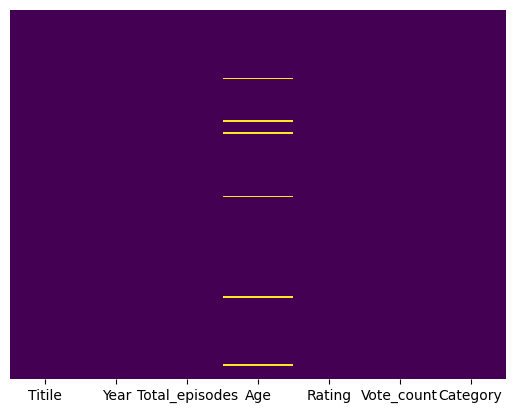

In [7]:
sns.heatmap(df.isnull(),yticklabels= False,cbar=False,cmap='viridis')

In [8]:
# check full value

null_age_rows = df.loc[df['Age'].isnull()]
null_age_rows

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
46,47. As If,2021,55 eps,NaN,9.0,(23K),TV Series
75,76. Gullak,2019,20 eps,NaN,9.1,(23K),TV Series
83,84. Reply 1988,20152016,20 eps,NaN,9.1,(12K),TV Series
126,127. Aspirants,2021,10 eps,NaN,9.2,(312K),TV Series
194,195. Rocket Boys,2022,17 eps,NaN,8.9,(18K),TV Series
240,241. Avrupa Yakasi,20042009,190 eps,NaN,8.6,(21K),TV Series


In [9]:
# we can replace NAN with Not Rating.We use the Fillna method for doing that task.

df['Age'] =df['Age'].fillna('Not Rated') 

In [10]:
df.isnull().sum()

Titile            0
Year              0
Total_episodes    0
Age               0
Rating            0
Vote_count        0
Category          0
dtype: int64

#### Now, we handle the year column. In the year, we see this '20082013' but I don't want this. I want only 2008 in the year column.
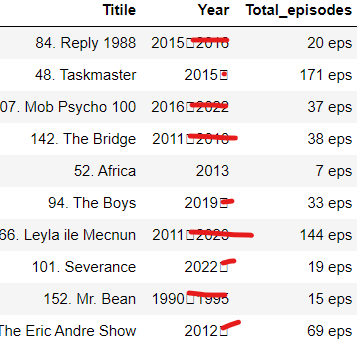

In [11]:
df['Year'] = df['Year'].apply(lambda x: x[:4])

In [12]:
df

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,2008,62 eps,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6 eps,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11 eps,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10 eps,15,9.4,(533K),TV Mini Series
4,5. Chernobyl,2019,5 eps,15,9.3,(876K),TV Mini Series
...,...,...,...,...,...,...,...
245,246. Your Lie in April,2014,24 eps,12,8.5,(39K),TV Series
246,247. Community,2009,110 eps,12,8.5,(295K),TV Series
247,248. Tear Along the Dotted Line,2021,6 eps,15,8.6,(15K),TV Mini Series
248,249. Chef's Table,2015,30 eps,15,8.5,(17K),TV Series


In [13]:
# handle outlier with the help of IQR method

In [14]:
# find quantile value of rating column
q3 = df['Rating'].quantile(0.75)
q1 = df['Rating'].quantile(0.25)
iqr = q3-q1

In [15]:
q1,q3,iqr

(8.6, 8.9, 0.3000000000000007)

In [16]:
# find upper and lower value with the help of quantile function
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
lower_limit,upper_limit

(8.149999999999999, 9.350000000000001)

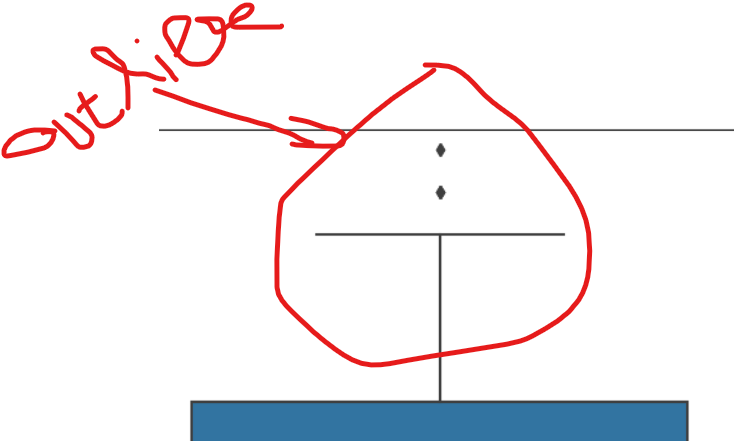

<Axes: >

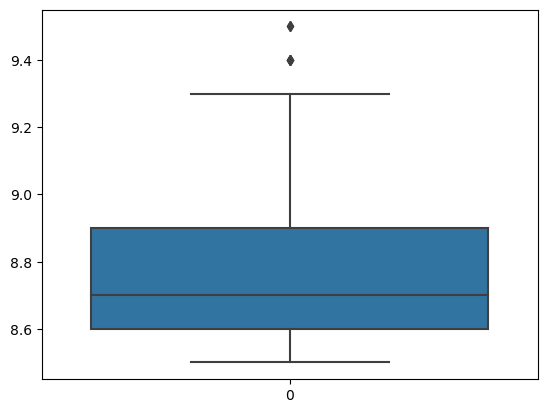

In [17]:
# Figure out the outlier with the help of a boxplot graph.
sns.boxplot(df['Rating'])

In [18]:
# find the range of outlier
df.loc[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]

,Titile,Year,Total_episodes,Age,Rating,Vote_count,Category
0,1. Breaking Bad,2008,62 eps,18,9.5,(2.2M),TV Series
1,2. Planet Earth II,2016,6 eps,PG,9.5,(159K),TV Mini Series
2,3. Planet Earth,2006,11 eps,PG,9.4,(221K),TV Mini Series
3,4. Band of Brothers,2001,10 eps,15,9.4,(533K),TV Mini Series
14,15. Bluey,2018,194 eps,U,9.4,(30K),TV Series
249,250. Sapne Vs Everyone,2023,5 eps,Mature,9.4,(67K),TV Series


In [19]:
# trim the data
new_df = df.loc[(df['Rating'] < upper_limit) & (df['Rating'] >lower_limit)]
print('Before removing outliers:',len(df))
print('After removing outlier:',len(new_df))
print('outliers:',len(df)-len(new_df))

Before removing outliers: 250
After removing outlier: 244
outliers: 6


In [20]:
# capping

'''Capping is a technique used in data preprocessing to limit extreme values (outliers) by setting a specified upper 
    and lower bound. This is often done to reduce the impact of outliers on statistical analyses 
    or machine learning models.'''

new_df = df.copy()
new_df.loc[(new_df['Rating']>upper_limit),'Rating'] =upper_limit
new_df.loc[(new_df['Rating']<lower_limit),'Rating'] =lower_limit

<Axes: >

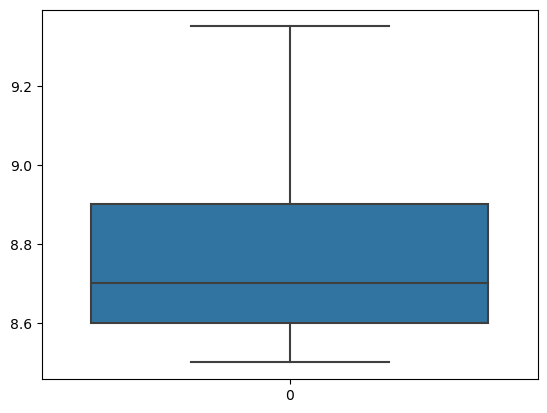

In [21]:
# Now outlier is removed
sns.boxplot(new_df['Rating'])

In [22]:
new_df.shape

(250, 7)

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titile          250 non-null    object 
 1   Year            250 non-null    object 
 2   Total_episodes  250 non-null    object 
 3   Age             250 non-null    object 
 4   Rating          250 non-null    float64
 5   Vote_count      250 non-null    object 
 6   Category        250 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.8+ KB


### Now, I handle datatypes. Most of the data are objects; we convert objects to strings.

In [24]:
new_df.columns

Index(['Titile', 'Year', 'Total_episodes', 'Age', 'Rating', 'Vote_count',
       'Category'],
      dtype='object')

In [25]:
new_df["Titile Total_episodes Age Vote_count Category".split()] = new_df['Titile Total_episodes Age Vote_count Category'.split()].astype("string")

In [26]:
new_df["Year"] = pd.to_datetime(new_df["Year"]).dt.year

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titile          250 non-null    string 
 1   Year            250 non-null    int32  
 2   Total_episodes  250 non-null    string 
 3   Age             250 non-null    string 
 4   Rating          250 non-null    float64
 5   Vote_count      250 non-null    string 
 6   Category        250 non-null    string 
dtypes: float64(1), int32(1), string(5)
memory usage: 12.8 KB


<Axes: >

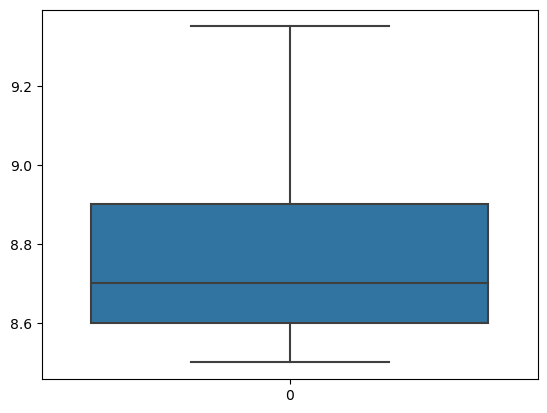

In [28]:
sns.boxplot(new_df['Rating'])

### The data clearing part is done. Now we start presenting all the data in the form of charts.

In [29]:
# What is the distribution of ratings?

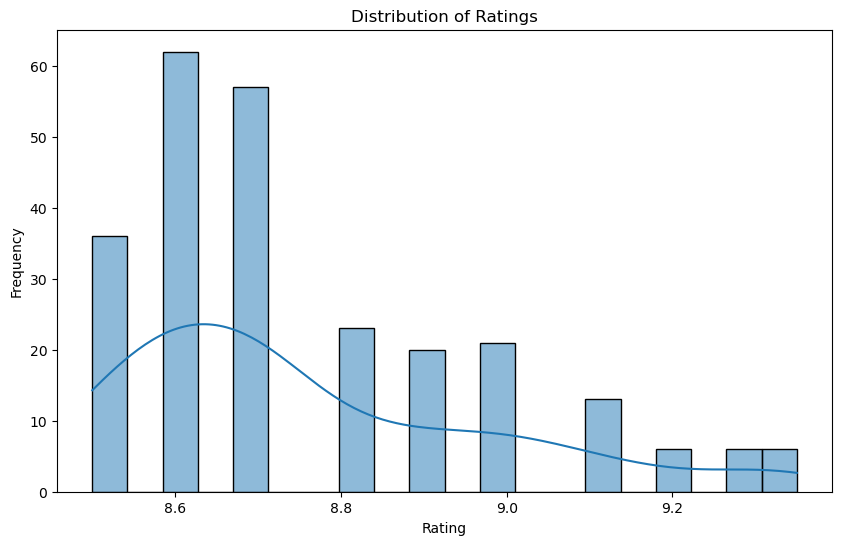

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(new_df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

***Observation:-*** The ratings distribution reveals an interesting pattern. Most ratings cluster around 9.0, suggesting a common consensus or quality level. Fewer extreme ratings exist, indicating that viewers.

In [31]:
# How many shows fall into each age category?

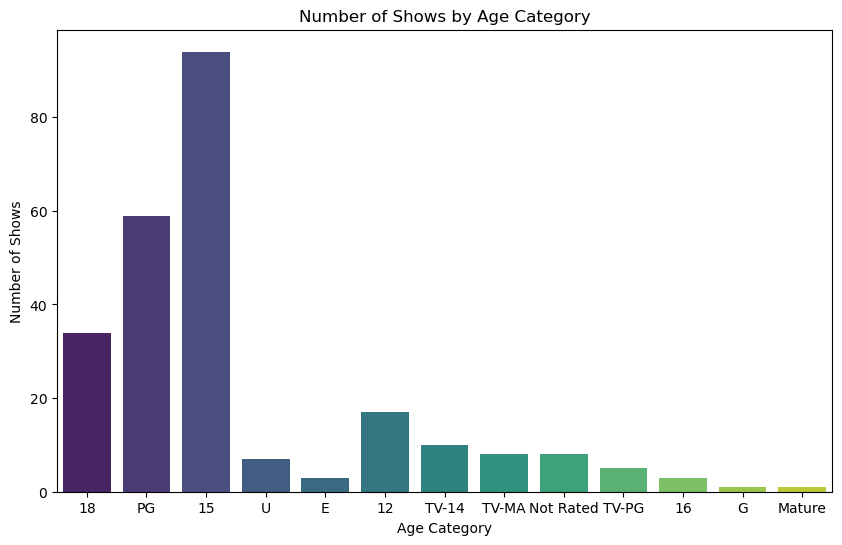

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df, x='Age', palette='viridis')
plt.title('Number of Shows by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Shows')
plt.show()

***Observation:-*** The plot displays the number of shows categorized by age. It seems that younger age groups attend more shows, as indicated by the higher bars. However, there’s a gradual decline in attendance as age increases. Overall, this visualization highlights the relationship between age and show attendance.

In [33]:
# What are the average ratings for each category?

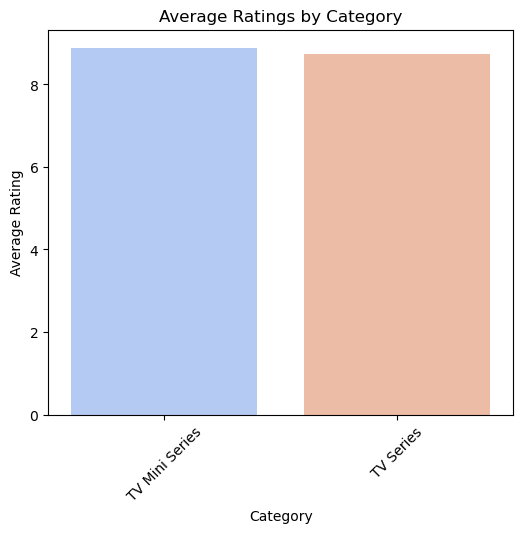

In [34]:
plt.figure(figsize=(6,5))
avg_rating = new_df.groupby('Category')['Rating'].mean().reset_index()
sns.barplot(data=avg_rating, x='Category', y='Rating', palette='coolwarm')
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

***Observation:-*** The bar chart shows how different categories are rated on average. Some categories consistently receive higher ratings, while others have slightly lower averages. Overall, this visualization gives us a glimpse into how viewers perceive these different categories.

In [35]:
# How does the number of votes correlate with the rating?

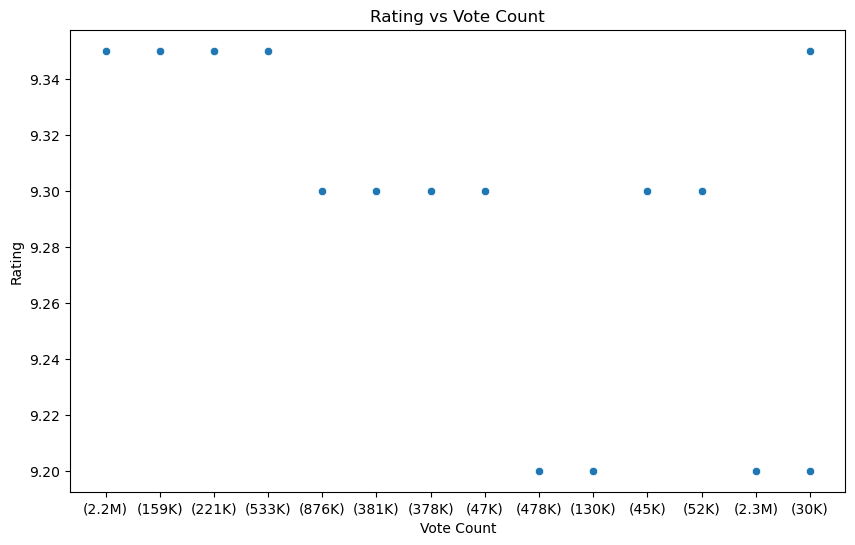

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_df[:15], x='Vote_count', y='Rating')
plt.title('Rating vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Rating')
plt.show()

***Observation:-*** The scatter plot reveals an interesting trend between ratings and vote counts. While popular items tend to have higher vote counts, it’s not always the case that they receive the highest ratings. Surprisingly, some less popular items have equally impressive ratings. This suggests that quality isn’t solely determined by popularity; hidden gems can shine even with fewer votes

In [37]:
# What is the trend of total episodes over the years?

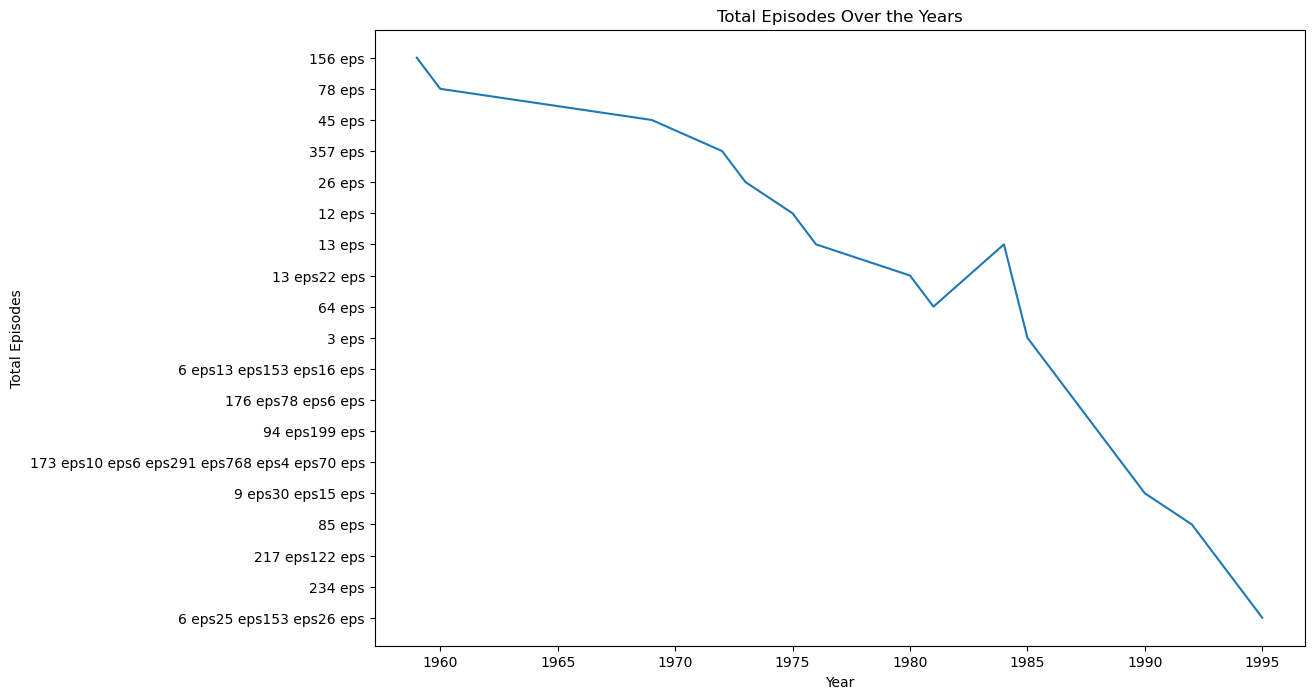

In [38]:
plt.figure(figsize=(12,8))
episodes_per_year = new_df.groupby('Year')['Total_episodes'].sum().reset_index()
sns.lineplot(data=episodes_per_year[:20], x='Year', y='Total_episodes')
plt.title('Total Episodes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Episodes')
plt.show()

***Observation:-*** The chart titled “Total Episodes Over the Years” shows a fascinating trend. From 1959 to 1995, the total number of TV show episodes declined significantly. Initially, around 1959, there were 156 episodes, but by 1995, this number had dropped to just 12 episodes. This decline suggests changes in television production, viewer preferences, or perhaps the emergence of other entertainment formats. It’s fascinating how the landscape of TV shows evolved over those years. 